# Part I - Loan Data from Prosper
## by Gabriel Michael O.

## Introduction
This data set contained 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. However, a subset of the dataset consisting of 15 variables was carved out to inspect, analyze and draw conclusions from. The variables used had the following description as gotten from [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0_):


   - ListingCreationDate - The date the listing was created.
   - CreditGrade -	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
   - Term -	The length of the loan expressed in months.
   - LoanStatus -	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
   - ProsperRating (numeric) -	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
   - ProsperScore -	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
   - ListingCategory - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
   - BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
   - Occupation	- The Occupation selected by the Borrower at the time they created the listing.
   - EmploymentStatusDuration	The length in months of the employment status at the time the listing was created.
   - IsBorrowerHomeowner -	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
   - IncomeVerifiable -	The borrower indicated they have the required documentation to support their income.
   - StatedMonthlyIncome -	The monthly income the borrower stated at the time the listing was created.
   - LoanOriginalAmount	The origination amount of the loan.
   - DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
   
   
   
## Table of Contents
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Univariate Exploration](#Univariate-Exploration)   
- [Bivariate Exploration](#Bivariate-Exploration)   
- [Multivariate Exploration](#Multivariate-Exploration)   
- [Conclusions](#Conclusions)
- [Limitations](#Limitations)








## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load the prosper data as a whole. 
tentative_loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#define columns to be used.
used_columns = ['ListingCreationDate', 'LoanStatus', 'CreditGrade', 'Term',
                'ProsperRating (numeric)', 'ProsperScore', 'Occupation', 'ListingCategory (numeric)',
                'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'BorrowerState', 'StatedMonthlyIncome',
                'LoanOriginalAmount','IncomeVerifiable','DebtToIncomeRatio']

The data will be further streamlined to focus on only those with verified income i.e those with accurate income values.

In [4]:
loan_data = tentative_loan_data[used_columns].query('IncomeVerifiable == True').copy()

Let's change the ListingCategory variable to the proper format.

In [5]:
listing_cat = {0:'Not Available',
               1 :'Debt Consolidation', 
               2 : 'Home Improvement',
               3 : 'Business',
               4 : 'Personal Loan',
               5 : 'Student Use', 
               6 : 'Auto', 
               7 : 'Other', 
               8 : 'Baby & Adoption', 
               9 : 'Boat', 
               10 : 'Cosmetic Procedure', 
               11 : 'Engagement Ring', 
               12 : 'Green Loans', 
               13 : 'Household Expenses', 
               14 : 'Large Purchases', 
               15 : 'Medical/Dental', 
               16 : 'Motorcycle', 
               17 : 'RV', 
               18 : 'Taxes', 
               19 : 'Vacation', 
               20 : 'Wedding Loans'
              }

In [6]:
loan_data['ListingCategory'] = loan_data['ListingCategory (numeric)'].map(listing_cat).astype('category')

In [7]:
loan_data.sample(5)

,ListingCreationDate,LoanStatus,CreditGrade,Term,ProsperRating (numeric),ProsperScore,Occupation,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,BorrowerState,StatedMonthlyIncome,LoanOriginalAmount,IncomeVerifiable,DebtToIncomeRatio,ListingCategory
46376,2013-01-21 12:10:00.100000000,Current,NaN,36,4.0,4.0,Executive,1,339.0,True,IL,10833.333333,12500,True,0.25,Debt Consolidation
83294,2007-02-03 08:13:12.240000000,Completed,HR,36,NaN,NaN,Other,0,NaN,False,NaN,3083.333333,1000,True,0.11,Not Available
37857,2012-07-24 05:41:55.747000000,Chargedoff,NaN,36,5.0,8.0,Bus Driver,13,65.0,False,GA,3333.333333,3000,True,0.03,Household Expenses
37534,2008-01-16 06:28:29.087000000,Chargedoff,D,36,NaN,NaN,Professional,1,27.0,True,GA,5916.666667,3500,True,0.11,Debt Consolidation
96006,2014-01-21 11:59:31.490000000,Current,NaN,60,4.0,7.0,Other,1,96.0,True,OH,7269.166667,25000,True,0.17,Debt Consolidation


In [8]:
loan_data.shape

(105268, 16)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105268 entries, 0 to 113936
Data columns (total 16 columns):
ListingCreationDate          105268 non-null object
LoanStatus                   105268 non-null object
CreditGrade                  27628 non-null object
Term                         105268 non-null int64
ProsperRating (numeric)      77520 non-null float64
ProsperScore                 77520 non-null float64
Occupation                   101719 non-null object
ListingCategory (numeric)    105268 non-null int64
EmploymentStatusDuration     97764 non-null float64
IsBorrowerHomeowner          105268 non-null bool
BorrowerState                99884 non-null object
StatedMonthlyIncome          105268 non-null float64
LoanOriginalAmount           105268 non-null int64
IncomeVerifiable             105268 non-null bool
DebtToIncomeRatio            105103 non-null float64
ListingCategory              105268 non-null category
dtypes: bool(2), category(1), float64(5), int64(3), object(5)


### What is the structure of your dataset?
There are 16 variables with 105,268 entries. It should be noted though, that there are two redundant variables.

### What is/are the main feature(s) of interest in your dataset?
As a whole it would be quite interesting to observe the relationship between the different variables, as well as, ultimately try to figure out the features that contribute to the LoanStatus variable. In other words, are there factors affecting the succesful loan repayment or otherwise of loans given out by Prosper? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Tentatively, one would think, DebtToIncomeRatio, LoanOriginalAmount, EmploymentStatusDuration, as well as, ProsperRating, should prominently feature in the determination of repayment status.

## Univariate Exploration



### What proportion of Loanees completed their loan repayments compared to the othe categories?

In [10]:
loan_data['LoanStatus'].value_counts(normalize=True)

Current                   0.498100
Completed                 0.335259
Chargedoff                0.101949
Defaulted                 0.045218
Past Due (1-15 days)      0.006859
Past Due (31-60 days)     0.003106
Past Due (91-120 days)    0.002631
Past Due (61-90 days)     0.002612
Past Due (16-30 days)     0.002299
FinalPaymentInProgress    0.001795
Past Due (>120 days)      0.000133
Cancelled                 0.000038
Name: LoanStatus, dtype: float64

The variable `LoanStatus` needs a bit of cleaning, which will require a little domain knowledge... "uses search engine"...voila, henceforth, all entries will be categorized as either; Completed, Current, or Defaulted. This is to make for easy understanding of the data. Consequently, those making final payments and those whose loans were cancelled will be put under Completed.

In [11]:
#Replace necessary values
loan_data['LoanStatus'] = (loan_data['LoanStatus'].replace('FinalPaymentInProgress', 'Completed')
                           .replace('Cancelled', 'Completed')
                           .replace('Chargedoff', 'Defaulted')
                           .replace('Past Due (1-15 days)', 'Defaulted')
                           .replace('Past Due (31-60 days)', 'Defaulted')
                           .replace('Past Due (61-90 days)', 'Defaulted')
                           .replace('Past Due (16-30 days)', 'Defaulted')
                           .replace('Past Due (91-120 days)', 'Defaulted')
                           .replace('Past Due (>120 days)', 'Defaulted')
                          )

In [12]:
loan_data['LoanStatus'].value_counts(normalize=True)

Current      0.498100
Completed    0.337092
Defaulted    0.164808
Name: LoanStatus, dtype: float64

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105268 entries, 0 to 113936
Data columns (total 16 columns):
ListingCreationDate          105268 non-null object
LoanStatus                   105268 non-null object
CreditGrade                  27628 non-null object
Term                         105268 non-null int64
ProsperRating (numeric)      77520 non-null float64
ProsperScore                 77520 non-null float64
Occupation                   101719 non-null object
ListingCategory (numeric)    105268 non-null int64
EmploymentStatusDuration     97764 non-null float64
IsBorrowerHomeowner          105268 non-null bool
BorrowerState                99884 non-null object
StatedMonthlyIncome          105268 non-null float64
LoanOriginalAmount           105268 non-null int64
IncomeVerifiable             105268 non-null bool
DebtToIncomeRatio            105103 non-null float64
ListingCategory              105268 non-null category
dtypes: bool(2), category(1), float64(5), int64(3), object(5)


In [14]:
credit_map = {0:'N/A',
              1:'HR', 
              2:'E', 
              3:'D',
              4:'C',
              5:'B',
              6:'A',
              7:'AA'
             }

In [15]:
loan_data['ProsperRating (numeric)'] = loan_data['ProsperRating (numeric)'].map(credit_map).astype('category')

In [16]:
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data['ListingCreationDate'])
loan_data['LoanStatus'] = loan_data['LoanStatus'].astype('category')

In [17]:
sns.set_style(style='darkgrid')

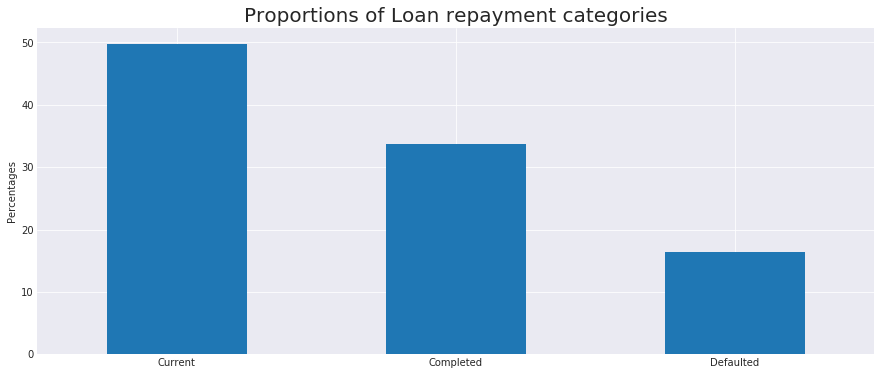

In [18]:
#Let's check that again
plt.figure(figsize=[15, 6])
(loan_data['LoanStatus'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Proportions of Loan repayment categories', fontsize=20)
plt.ylabel('Percentages')
#plt.xlabel('Loan repayment category', fontsize=14)
plt.xticks(rotation=0);
#plt.bar_label;

As seen from the bar plot above, about 33.7% of loan repayments were actually completed with a majority of the repayments classified as `current`. Are there any patterns, to be discovered from those who fully paid their loans compared to the others? First, let's see the distributions of other variables.

### What is the distribution of Credit Grade, Prosper credit rating, Loan terms,  Employment duration, Monthly Income, and Category of Listing?

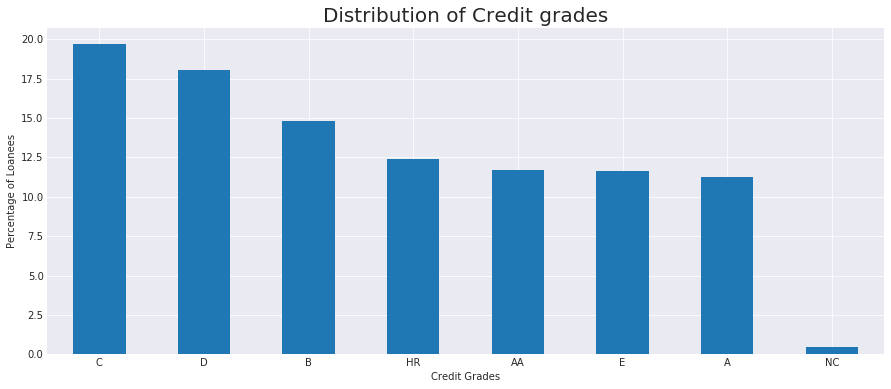

In [19]:
plt.figure(figsize=[15, 6])
(loan_data['CreditGrade'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Distribution of Credit grades', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Credit Grades')
plt.xticks(rotation=0);

Once again, it's seen that majority of the loanees were in either `C`, `D`, or `B` category. While we're here let's check the prominent category amongst those with "Completed" loan repayment status compared with the "Defaulters".

In [20]:
def showplotCat(df=loan_data, col_name='CreditGrade', norm=True, kind='bar', rotation=0):
    """
    Create a two plots side by side for a given categorical variable.
    
    """
    mask_grade = df['LoanStatus'] == 'Completed'
    mask_ungrade = df['LoanStatus'] == 'Defaulted'
    
    plt.figure(figsize=[25, 8])

    plt.subplot(1, 2, 1)
    (df[mask_grade][col_name].value_counts(normalize=norm)*100).plot(kind, color='tab:blue')
    plt.title('Distribution of {}(Completed)'.format(col_name))
    if norm:
        plt.ylabel('Percentage of Loanees')
    else:
        plt.ylabel('No of Loanees')
    plt.xlabel('{}'.format(col_name))
    plt.xticks(rotation=rotation)

    plt.subplot(1, 2, 2)
    (df[mask_ungrade][f'{col_name}'].value_counts(normalize=norm)*100).plot(kind, color='tab:blue')
    plt.title('Distribution of {}(Defaulters)'.format(col_name))
    if norm:
        plt.ylabel('Percentage of Loanees')
    else:
        plt.ylabel('No of Loanees')    
    plt.xlabel('{}'.format(col_name))
    plt.xticks(rotation=rotation);

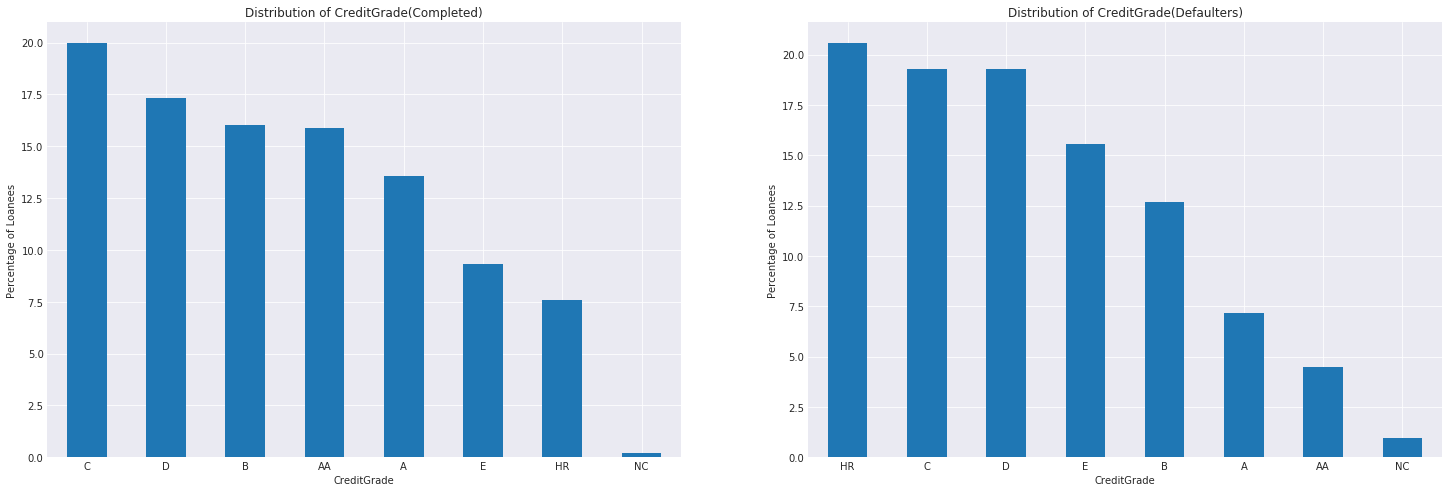

In [21]:
showplotCat()

The former deduction is even more emphatic as an ovewhelming majority of loanees with "Completed" loan repayment status are in the `C`, `D`, and `B` categotries, with defaulters having `HR` as their most dominant category. How about data post 2009?

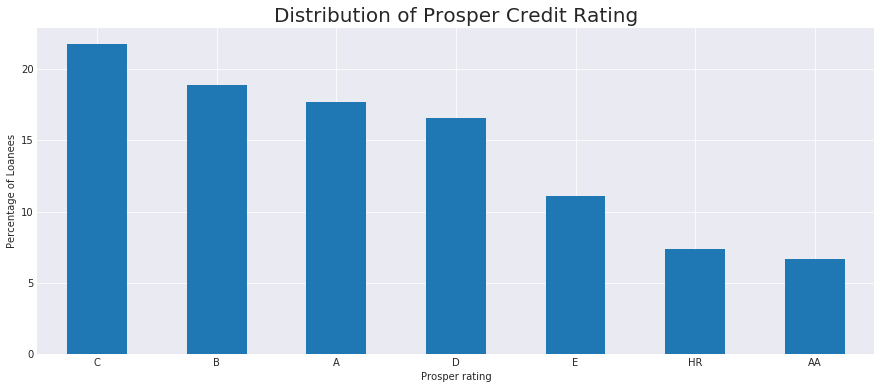

In [22]:
plt.figure(figsize=[15, 6])
(loan_data['ProsperRating (numeric)'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Distribution of Prosper Credit Rating', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Prosper rating')
plt.xticks(rotation=0);

The general trend in this credit rating seems to suggest a higher overall performance as ratings `C`, `B`, and `A`, appear more prominently. However, caution is key here, so before making deductions let's check further:

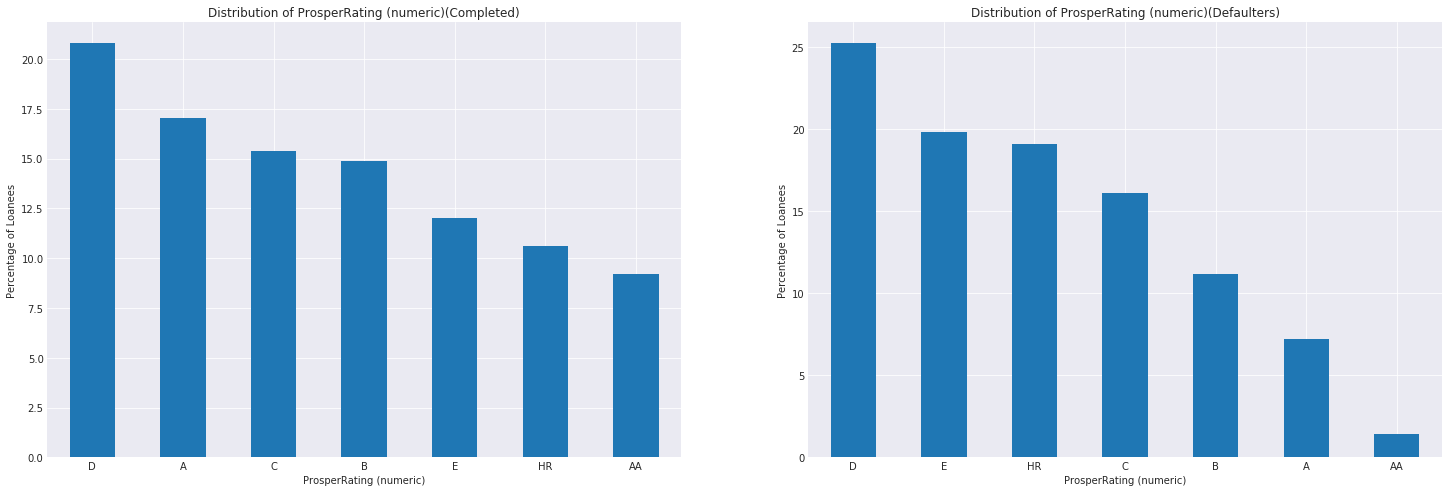

In [23]:
showplotCat(col_name='ProsperRating (numeric)')

Again, we see that on a more general note, defaulters tended to have a lower credit rating. Next is loan terms.

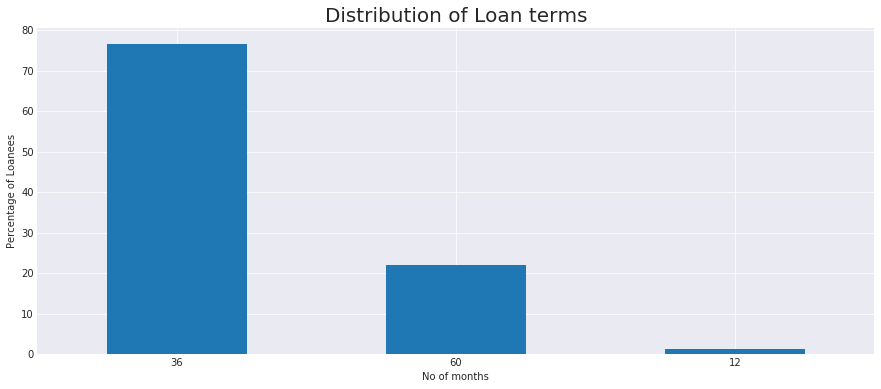

In [24]:
plt.figure(figsize=[15, 6])
(loan_data['Term'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Distribution of Loan terms', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('No of months')
plt.xticks(rotation=0);

An overwhelming majority of the loans under consideration were for `36` months, which if coupled with the `60` months figures ensures that MOST of the loans were medium or long-term. Side question: What were they using  the loans for? as funds used for consumption tend to be short term in nature, while long term loans are generally believed to be for investment(Mortgage, Business etc.)  

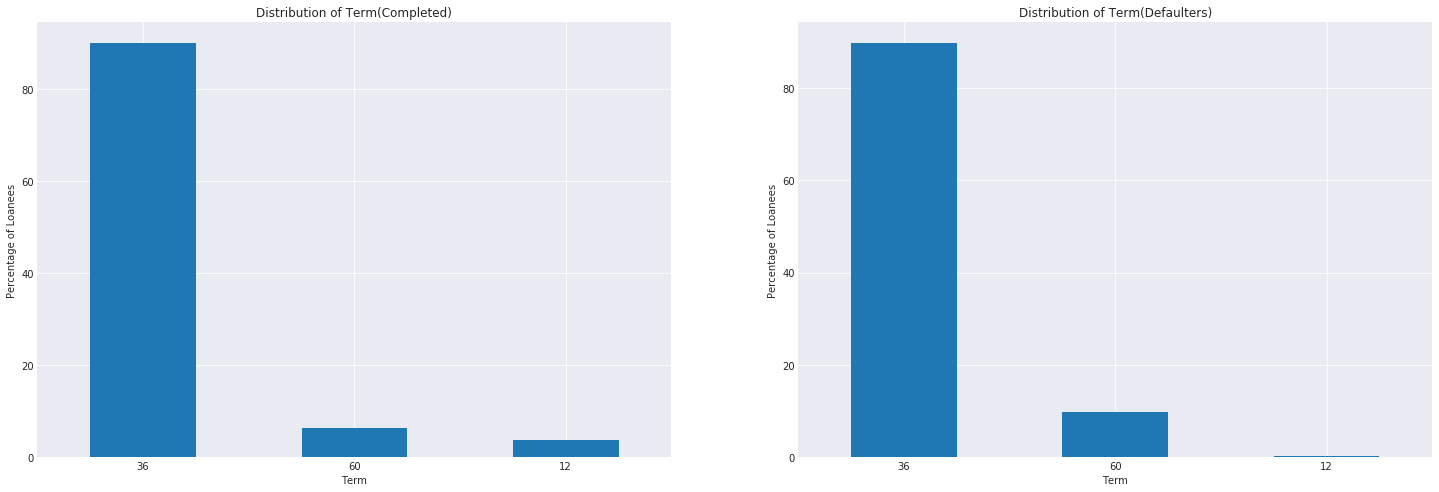

In [25]:
showplotCat(col_name='Term')

There really is no major difference between the two, bar that, defaulters tended not to borrow as much short term loans as those who adherred to payments. Now, before continuing, What was the loan for?

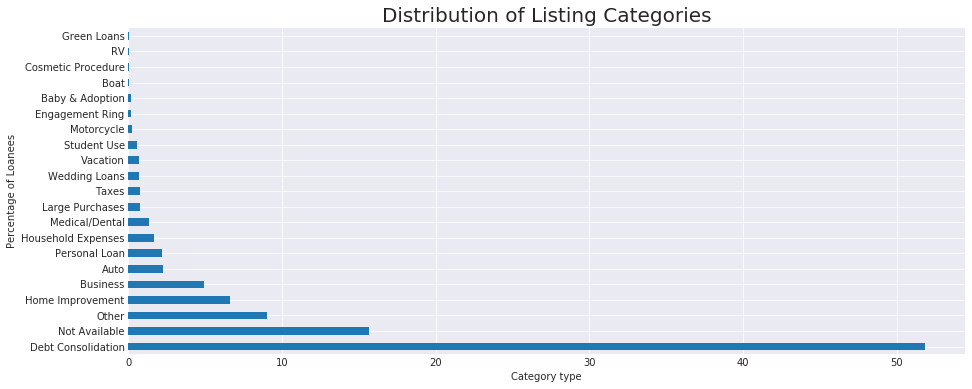

In [26]:
plt.figure(figsize=[15, 6])
(loan_data['ListingCategory'].value_counts(normalize=True)*100).plot('barh', color='tab:blue')
plt.title('Distribution of Listing Categories', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Category type')
plt.xticks(rotation=0);

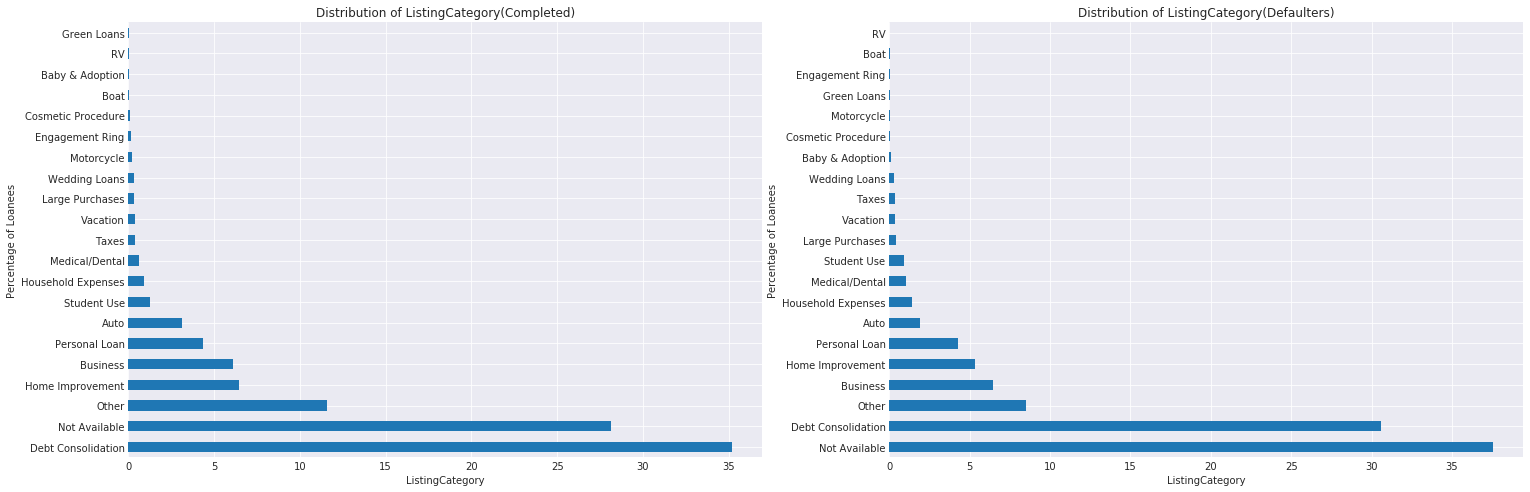

In [27]:
showplotCat(col_name='ListingCategory', kind='barh')

The above while indicative, is inconclusive, as though it showed there was a possible abuse of the system as `Debt Consolidation` featured prominently in both sides of the discuss, it still isn't enough to draw conclusions from or about. How about checking occupation and home ownership to see if there could be any leads.

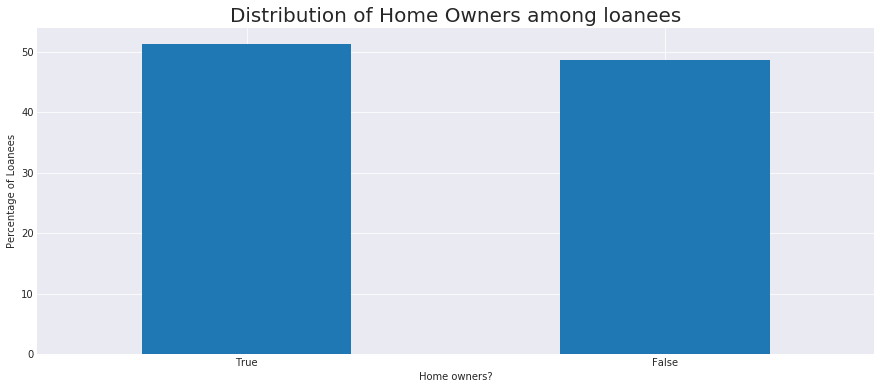

In [28]:
plt.figure(figsize=[15, 6])
(loan_data['IsBorrowerHomeowner'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Distribution of Home Owners among loanees', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Home owners?')
plt.xticks(rotation=0);

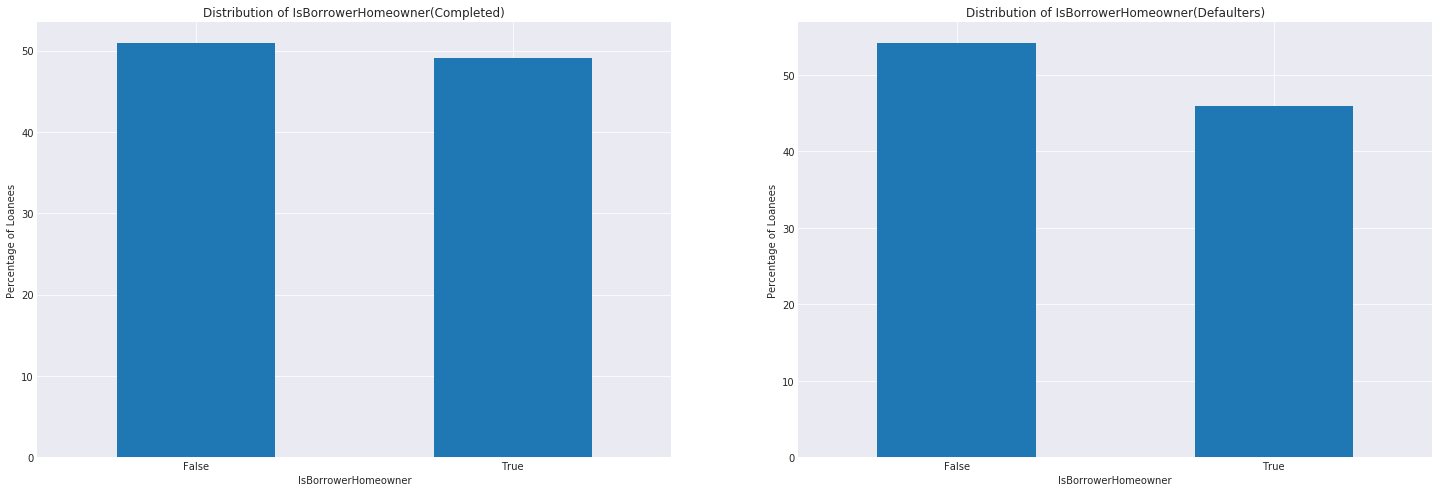

In [29]:
showplotCat(col_name='IsBorrowerHomeowner')

In general, we have more owners amongst the loanees, though the difference is slight, whilse defaulters had more loanees who don't own homes. Final point to check before dropping this bone(literal), occupation:

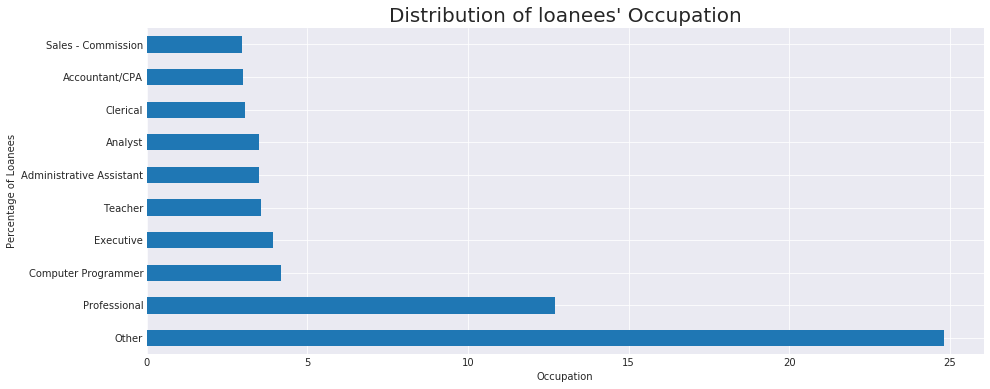

In [30]:
plt.figure(figsize=[15, 6])
(loan_data['Occupation'].value_counts(normalize=True)*100).head(10).plot('barh', color='tab:blue')
plt.title('Distribution of loanees\' Occupation', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Occupation')
plt.xticks(rotation=0);

The ten most common occupations among loanees are highlighted above, it's just a wonder what `other` could be standing for, as the remaining occupations are pretty much professionals with none aligned towards business....hmmn(confused)...Let's look through `Employmment duration`. 

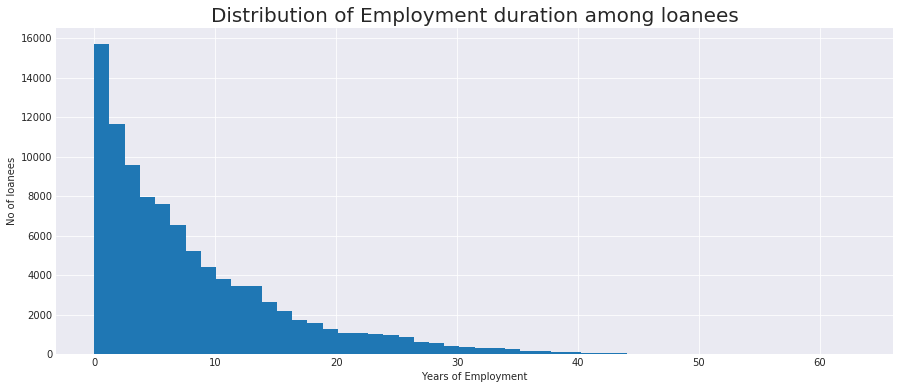

In [31]:
plt.figure(figsize=[15, 6])
(loan_data['EmploymentStatusDuration']/12).hist(bins=50)
plt.title('Distribution of Employment duration among loanees', fontsize=20)
plt.ylabel('No of loanees')
plt.xlabel('Years of Employment')
plt.xticks(rotation=0);

Aha! there it is, the VAST majority of these folks have worked for less than 5 years, with a spike at year 0-1,(Zoom in or not; not), it's clear, but to be safe, let's check:

In [32]:
loan_data.query('EmploymentStatusDuration == 0')['Occupation'].value_counts()

Other                                 297
Professional                           64
Sales - Commission                     43
Computer Programmer                    43
Sales - Retail                         32
Executive                              21
Clerical                               21
Analyst                                21
Nurse (RN)                             20
Teacher                                19
Accountant/CPA                         17
Administrative Assistant               16
Skilled Labor                          11
Retail Management                      11
Construction                           10
Food Service                           10
Truck Driver                            9
Attorney                                8
Laborer                                 8
Waiter/Waitress                         8
Tradesman - Mechanic                    7
Engineer - Electrical                   6
Engineer - Mechanical                   6
Professor                         

There are serious issues with the data as previously thought, however, it is quite clear that `other` ought to have been "unemployed". Thus, the majority of loanees were unemployed and had sinificantly low experience. Conundrum: How can unemployed people afford homes, inheritance? beyond the scope of this data. So like the many mysteries of the uni/multiverse, this will remain unsolved without sufficient data. However, at the risk of conjecturing, it does seem that a number of the loanees were using loans  to service loans(pun unintended). Back to inspecting features:

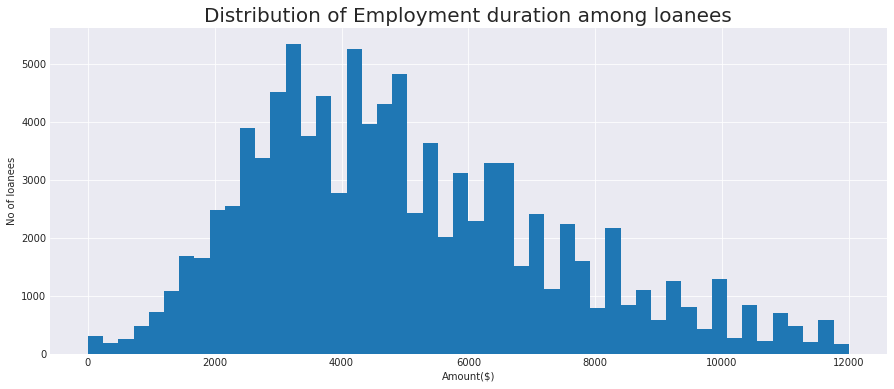

In [33]:
plt.figure(figsize=[15, 6])
(loan_data.query('StatedMonthlyIncome <= 12000')['StatedMonthlyIncome']).hist(bins=50)
plt.title('Distribution of Employment duration among loanees', fontsize=20)
#plt.xscale('log')
plt.ylabel('No of loanees')
plt.xlabel('Amount($)')
plt.xticks(rotation=0);

In [34]:
(loan_data['StatedMonthlyIncome'] > 12000).sum()

5455

In the grand scheme of things, the almost  5,500 entries removed shouldn't matter much as they were majorly outliers and the removal worked better than some of the transformations. So bak to the plot, it's generally observed that most of the loanees belonged to the low income category, thus supporting the notion:"borrowing for consumption". Thus far, it would seem that the debt servicing was what made the debt term increased, it would be quite informative to look through a variable showing number of loans per loanee, alas in this data set, it doesn't exist.

## Bivariate Exploration


It would be quite interesting to note the relationships between the different variables, especially considering the defaulters and "completers". It is at this juncture I feel like I'm having my Eureka! moment, since businesses tend to run loans concurently, would it not have made sense to check the `Current` amongst the loanees, especially as regards the Loan term conundrum? well why not?  

In [35]:
mask_curr = loan_data['LoanStatus'] == 'Current'

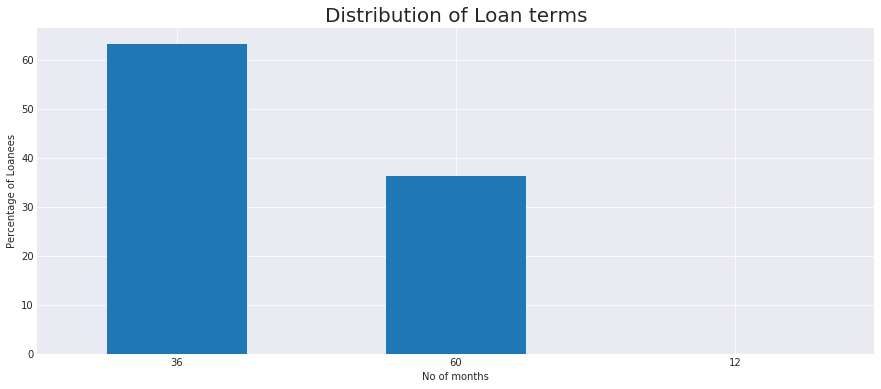

In [36]:
plt.figure(figsize=[15, 6])
(loan_data[mask_curr]['Term'].value_counts(normalize=True)*100).plot('bar', color='tab:blue')
plt.title('Distribution of Loan terms', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('No of months')
plt.xticks(rotation=0);

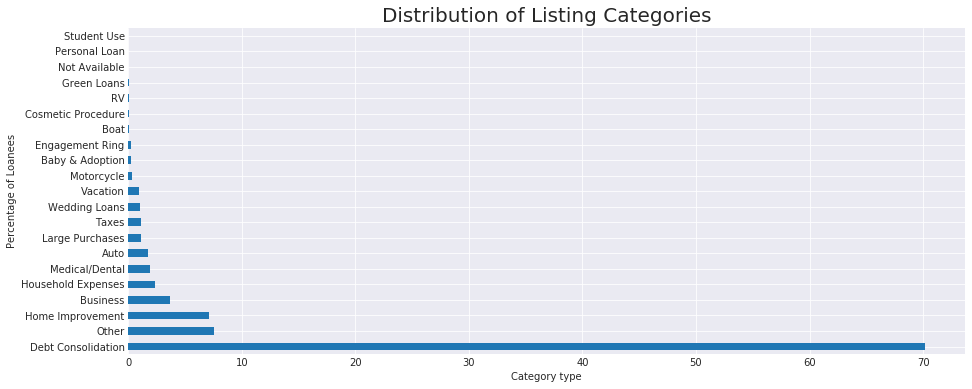

In [37]:
plt.figure(figsize=[15, 6])
(loan_data[mask_curr]['ListingCategory'].value_counts(normalize=True)*100).plot('barh', color='tab:blue')
plt.title('Distribution of Listing Categories', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Category type')
plt.xticks(rotation=0);

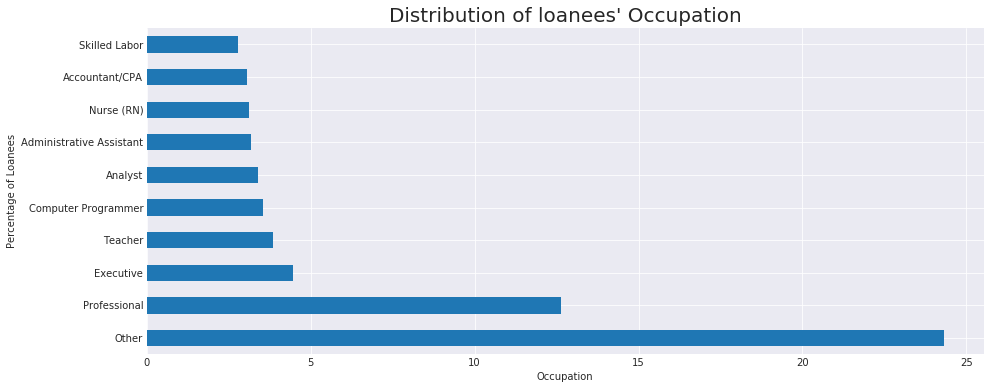

In [38]:
plt.figure(figsize=[15, 6])
(loan_data[mask_curr]['Occupation'].value_counts(normalize=True)*100).head(10).plot('barh', color='tab:blue')
plt.title('Distribution of loanees\' Occupation', fontsize=20)
plt.ylabel('Percentage of Loanees')
plt.xlabel('Occupation')
plt.xticks(rotation=0);

Eye == opened, this couldn't be more emphatic, all conjectures made thus far have been kicked up the proverbial backside, and boom! reality land here we come. Jokes aside, the patterns found in the subsets couldn't have been more pronounced(tongue in cheek). So, jettisoning that, we move on to  try to compare some interesting features. Fist of all, correlation is a good friend.

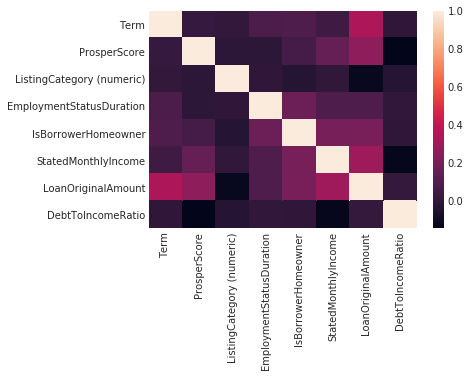

In [39]:
sns.heatmap(loan_data.drop(columns='IncomeVerifiable').corr());

Too much, makes not much sense, well, though jumbled, it does show some relationships which can be further investigated.

### Is there any relationship between Monthly Income and Amount Loaned?

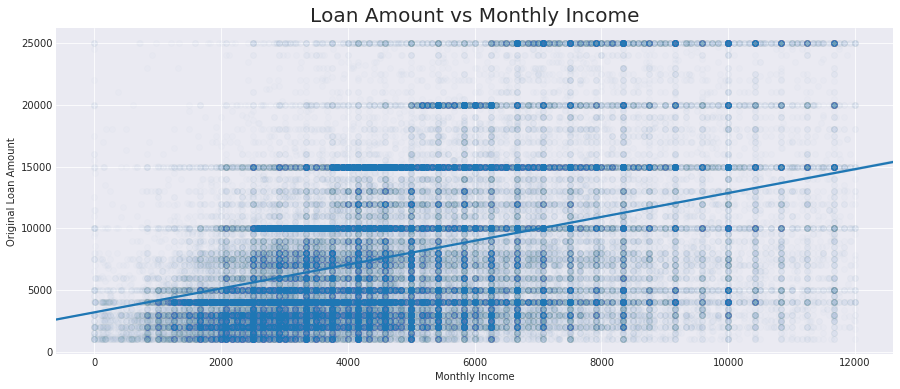

In [40]:
plt.figure(figsize=[15, 6])
(sns.regplot(data=loan_data.query('(StatedMonthlyIncome <= 12000) & (LoanOriginalAmount <= 25000)'),
             x='StatedMonthlyIncome', y='LoanOriginalAmount',
             scatter_kws={'alpha':0.01}))
plt.title('Loan Amount vs Monthly Income', fontsize=20)
plt.ylabel('Original Loan Amount')
plt.xlabel('Monthly Income')
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=0);

There seems to be a positive relationship between Monthly income and amount loaned which is logical as lenders need a bit of security while giving out loans to applicants.

### What are the different income levels among the different loanee categories?

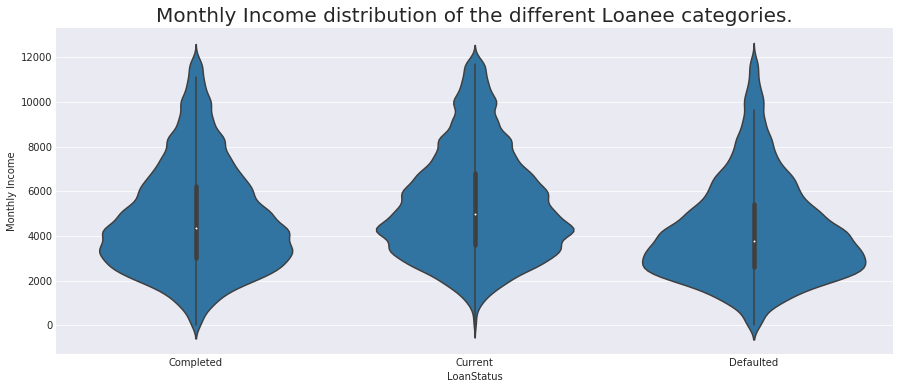

In [43]:
plt.figure(figsize=[15, 6])
(sns.violinplot(data=loan_data.query('StatedMonthlyIncome <= 12000'),
             y='StatedMonthlyIncome', x='LoanStatus', color='tab:blue',
             scatter_kws={'alpha':0.01}))
plt.title('Monthly Income distribution of the different Loanee categories.', fontsize=20)
#plt.ylabel('Original Loan Amount')
plt.ylabel('Monthly Income')
#plt.annotate()
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=0);

Generally,as seen earlier, defaulters tended to have a lower average income compared to the other categories. 

### What is the relationship between Credit score and Amount Loaned?

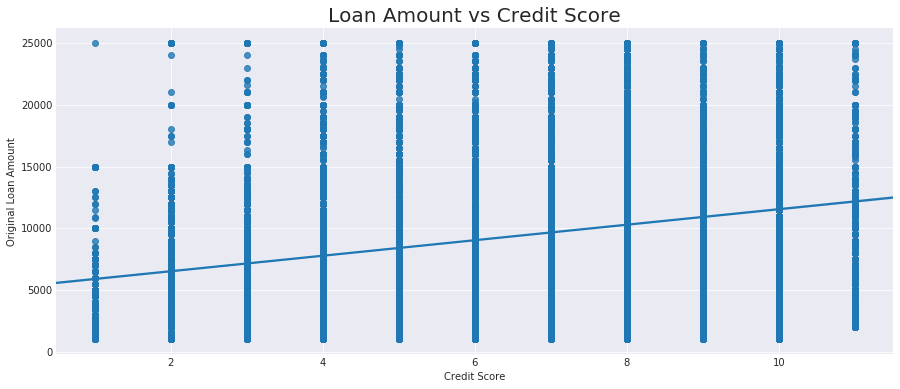

In [44]:
plt.figure(figsize=[15, 6])
sns.regplot(data=loan_data.query('LoanOriginalAmount <= 25000'),
             x='ProsperScore', y='LoanOriginalAmount', color='tab:blue')
plt.title('Loan Amount vs Credit Score', fontsize=20)
plt.ylabel('Original Loan Amount')
plt.xlabel('Credit Score')
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=0);

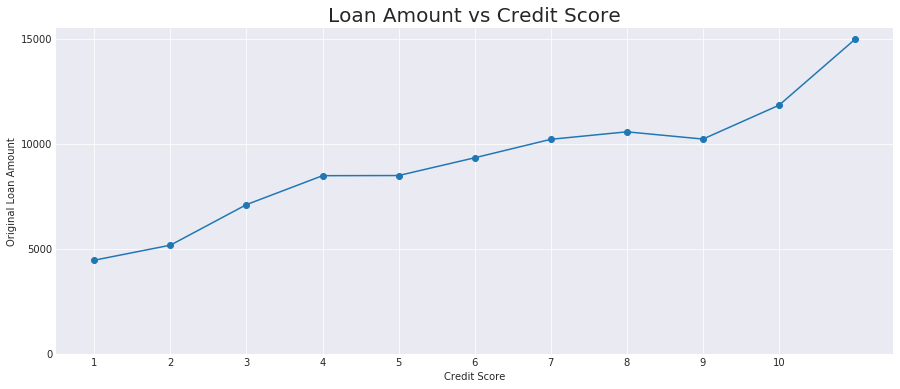

In [45]:
plt.figure(figsize=[15, 6])
loan_data.groupby('ProsperScore')['LoanOriginalAmount'].mean().plot(marker='o')
plt.title('Loan Amount vs Credit Score', fontsize=20)
plt.ylabel('Original Loan Amount')
plt.xlabel('Credit Score')
plt.xticks(range(1, 11, 1))
plt.yticks(range(0, 20000, 5000))
plt.xticks(rotation=0);

The trend in the plot above shows that higher loan amounts are associated with higher credit scores generally, however, there seems to be  outliers which is to be expected.

### Does debt to income ratio have any relationship with credit score?

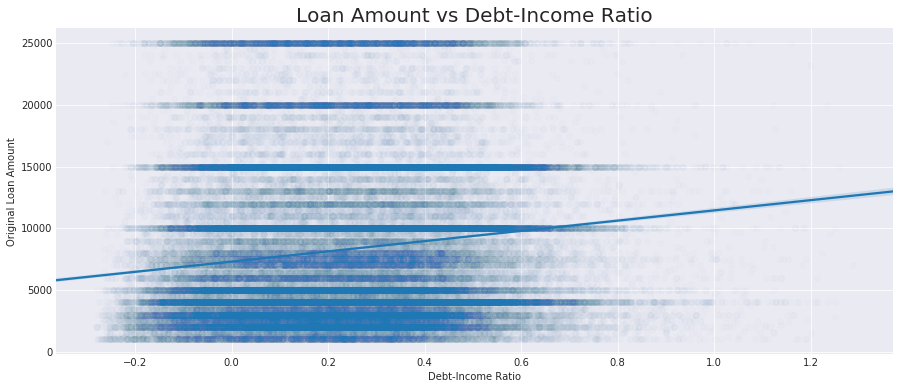

In [46]:
plt.figure(figsize=[15, 6])
sns.regplot(data=loan_data.query('(LoanOriginalAmount <= 25000) & (DebtToIncomeRatio <= 1)'),
             x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, color='tab:blue', scatter_kws={'alpha':0.01})
plt.title('Loan Amount vs Debt-Income Ratio', fontsize=20)
plt.ylabel('Original Loan Amount')
plt.xlabel('Debt-Income Ratio')
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=0);

Another upward trend shows a positive relationship between the two variables, showing that greater Debt-income ratio is associated with higher loan amounts.

## Multivariate Exploration


### Can any link be found between Monthly Income and Employment duration(work experience)?

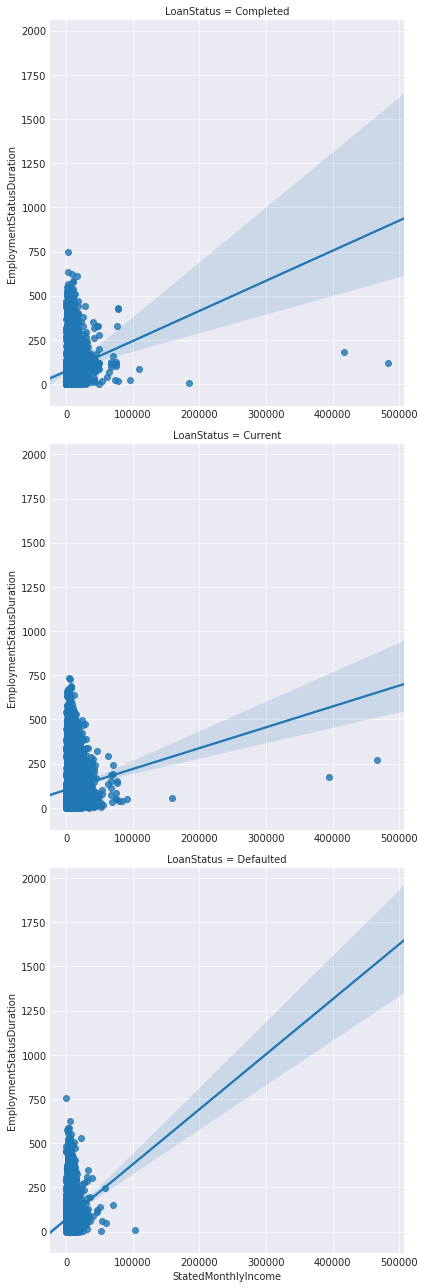

In [47]:
g = sns.FacetGrid(data=loan_data, row='LoanStatus', size=6)
g.map(sns.regplot, 'StatedMonthlyIncome', 'EmploymentStatusDuration');

As expected, there is a positive relationship between work experience and reported monthly income.

## Conclusions
The wrangling, analysis, and visualization of data from Prosper loans was carried out with the following findings realized:

   - A majority of loan repayments were classified as current.
   - There were generally  higher overall credit ratings.
   - An overwhelming majority of the loans under consideration were medium or long-term.
   - `Debt Consolidation` was the most prominent reason for loan collection.
   - There were generally more home owners amongst the loanees, 
   - There seemed to be a positive relationship between Monthly income and amount loaned. 
   - Loan defaulters tended to have a lower average income compared to the other categories. 
   - Higher loan amounts were associated with higher credit scores.
   - Greater Debt-income ratio was associated with higher loan amounts.
   - There was a positive relationship between work experience and reported monthly income.
   
## Limitations
It should be noted that the data was highly irregular and additional clarifications(domain expertise) will be needed in order to get a meaningful analysis out of it. Additionally, every conclusion drawn from this data set is subject to this particular data ONLY and is therefore not to be generalized.